In [4]:

import pandas as pd
import numpy as np
 
from sklearn.preprocessing import LabelEncoder
 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#train_raw 教師データ
train = pd.read_csv('train.csv') 
#test_raw テストデータ
test = pd.read_csv('test.csv') 
print('The size of the train data:' + str(train_raw.shape))
print('The size of the test data:' + str(test_raw.shape))


train_mid = train.copy()
test_mid = test.copy()
train_mid['train_or_test'] = 'train' #学習データフラグ
test_mid['train_or_test'] = 'test' #テストデータフラグ
test_mid['Survived'] = 9 #テストにSurvivedカラムを仮置き

#alldataに教師データ、テストデータを結合
alldata = pd.concat(
    [
        train_mid,
        test_mid
    ],
    sort=False,
    axis=0
).reset_index(drop=True)
print('The size of the alldata data:' + str(alldata.shape))

The size of the train data:(891, 12)
The size of the test data:(418, 11)
The size of the alldata data:(1309, 13)


In [8]:
test.describe()
train.describe()
 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:

def kesson_table(df): 
        null_val = df.isnull().sum()
        percent = 100 * df.isnull().sum()/len(df)
        kesson_table = pd.concat([null_val, percent], axis=1)
        kesson_table_ren_columns = kesson_table.rename(
        columns = {0 : '欠損数', 1 : '%'})
        return kesson_table_ren_columns
 
kesson_table(train)
kesson_table(test)

,欠損数,%
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,86,20.574163
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,1,0.239234
Cabin,327,78.229665


In [14]:
train["Age"] = train["Age"].fillna(train["Age"].median())
train["Embarked"] = train["Embarked"].fillna("S")
 
 
kesson_table(train)

,欠損数,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [15]:

train["Sex"][train["Sex"] == "male"] = 0
train["Sex"][train["Sex"] == "female"] = 1
train["Embarked"][train["Embarked"] == "S" ] = 0
train["Embarked"][train["Embarked"] == "C" ] = 1
train["Embarked"][train["Embarked"] == "Q"] = 2
 
train.head(10)

C:\Users\takes\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\takes\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\takes\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\takes\Anaconda3\lib\

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0
5,6,0,3,"Moran, Mr. James",0,28.0,0,0,330877,8.4583,NaN,2
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,1


In [21]:

test["Age"] = test["Age"].fillna(test["Age"].median())
test["Sex"][test["Sex"] == "male"] = 0
test["Sex"][test["Sex"] == "female"] = 1
test["Embarked"][test["Embarked"] == "S"] = 0
test["Embarked"][test["Embarked"] == "C"] = 1
test["Embarked"][test["Embarked"] == "Q"] = 2
test.Fare[152] = test.Fare.median()

test.head(10)

C:\Users\takes\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\takes\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\takes\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\takes\Anaconda3\l

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,NaN,0
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,NaN,2
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,NaN,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,7.2292,NaN,1
9,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,24.1500,NaN,0


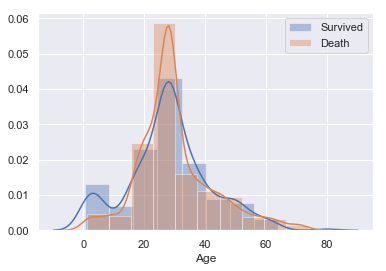

In [17]:
#年齢に中央値を入れた後の分布確認

sns.distplot(train[train['Survived']==1]['Age'],kde=True,rug=False,bins=10,label='Survived') #生存者の分布
sns.distplot(train[train['Survived']==0]['Age'],kde=True,rug=False,bins=10,label='Death') #死者の分布
plt.legend()



In [22]:

# scikit-learnのインポートをします
from sklearn import tree


# 「train」の目的変数と説明変数の値を取得
target = train["Survived"].values
features_one = train[["Pclass", "Sex", "Age", "Fare"]].values

# 決定木の作成
my_tree_one = tree.DecisionTreeClassifier()
my_tree_one = my_tree_one.fit(features_one, target)

# 「test」の説明変数の値を取得
test_features = test[["Pclass", "Sex", "Age", "Fare"]].values

# 「test」の説明変数を使って「my_tree_one」のモデルで予測
my_prediction = my_tree_one.predict(test_features)

In [23]:
my_prediction.shape

(418,)

In [24]:

#予測データの中身を確認
print(my_prediction)

[0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0
 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0
 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1
 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 0 0 1 0 0 0]


In [25]:
#決定木の予測結果をcsvで出力する。
# PassengerIdを取得
PassengerId = np.array(test["PassengerId"]).astype(int)

# my_prediction(予測データ）とPassengerIdをデータフレームへ落とし込む
my_solution = pd.DataFrame(my_prediction, PassengerId, columns = ["Survived"])

# my_tree_one.csvとして書き出し
my_solution.to_csv("my_tree_one.csv", index_label = ["PassengerId"])

In [30]:
#ランダムフォレストで識別
from sklearn.ensemble import RandomForestClassifier

# 「train」の目的変数と説明変数の値を取得
target = train["Survived"].values
features_one = train[["Pclass", "Sex", "Age", "Fare"]].values

## 決定木の作成
#my_tree_one = tree.DecisionTreeClassifier()
#my_tree_one = my_tree_one.fit(features_one, target)

rfc = RandomForestClassifier(random_state=0)
#rfc = RandomForestClassifier(n_estimators=5, random_state=2)
rfc.fit(features_one, target)


# 「test」の説明変数の値を取得
test_features = test[["Pclass", "Sex", "Age", "Fare"]].values

# 「test」の説明変数を使って「my_tree_one」のモデルで予測
my_rfc_prediction = rfc.predict(test_features)


#print('='*20)
#print('RandomForestClassifier')
#print(f'accuracy of train set: {rfc.score(features_one, target)}')
#print(f'accuracy of test set: {rfc.score(features_one, target)}')


C:\Users\takes\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [31]:
my_rfc_prediction.shape

(418,)

In [32]:
#ランダムフォレストの予測結果をcsvで出力する。
# PassengerIdを取得
PassengerId = np.array(test["PassengerId"]).astype(int)

# my_prediction(予測データ）とPassengerIdをデータフレームへ落とし込む
my_rfc_solution = pd.DataFrame(my_rfc_prediction, PassengerId, columns = ["Survived"])

# my_tree_one.csvとして書き出し
my_rfc_solution.to_csv("my_rfc_one.csv", index_label = ["PassengerId"])

In [35]:
#SVMを使って識別
from sklearn.svm import SVC

# 「train」の目的変数と説明変数の値を取得
target = train["Survived"].values
features_one = train[["Pclass", "Sex", "Age", "Fare"]].values

svc = SVC(random_state=0)
svc.fit(features_one, target)


# 「test」の説明変数の値を取得
test_features = test[["Pclass", "Sex", "Age", "Fare"]].values

# 「test」の説明変数を使って「my_tree_one」のモデルで予測
my_svc_prediction = svc.predict(test_features)


C:\Users\takes\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [36]:
my_svc_prediction.shape

(418,)

In [37]:
#ランダムフォレストの予測結果をcsvで出力する。
# PassengerIdを取得
PassengerId = np.array(test["PassengerId"]).astype(int)

# my_prediction(予測データ）とPassengerIdをデータフレームへ落とし込む
my_svc_solution = pd.DataFrame(my_svc_prediction, PassengerId, columns = ["Survived"])

# my_tree_one.csvとして書き出し
my_svc_solution.to_csv("my_svc_one.csv", index_label = ["PassengerId"])